# EE 559 Project 1

#### Comparing couple of images from MNIST dataset using DCNN.

In [3]:
import torch

import dlc_practical_prologue as prologue
from models import *
from training import *

# Load the Dataset

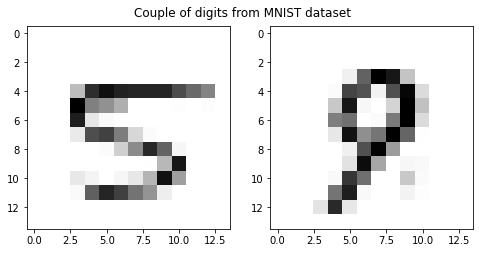

In [4]:
N = 1000
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(N)

# Example
n = torch.randint(1000,[1])[0]
fig, axs = plt.subplots(1,2, figsize=(8,10))
fig.subplots_adjust(top=1.5)
fig.suptitle('Couple of digits from MNIST dataset')
axs[0].imshow(train_input[n,0], cmap='Greys')
axs[1].imshow(train_input[n,1], cmap='Greys');

# DeepConvNet
## Baseline

Device used:  cuda
Loading training and test set...
Splitted the training set in training and validation set
Number of parameters of the model: 2700834
Training...
Training time: 21.355 seconds
The model weights have been correctly saved in:  ./model_weights/DeepConvNet.pth

Training error: 15.667 %
Validation error: 25.000 %
Test error: 25.900 %


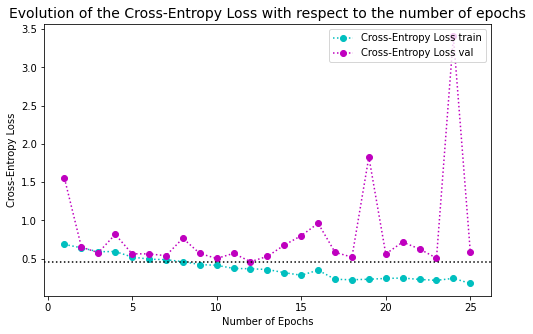

In [5]:
# auxiliary loss
use_auxiliary_loss = False
aux_loss_weight = 0.3   # <0.5

# model
model = DeepConvNet(use_auxiliary_loss)
model_name='DeepConvNet'

# training
percentage_val = 0.1
augment = False
nb_epochs = 25
batch_size = 25

# optimizer
weight_decay = 0.001
lr = 0.001
period = 1

# display
verbose = 1
plot = True

run_experiment(model, use_auxiliary_loss=use_auxiliary_loss, aux_loss_weight=aux_loss_weight, model_name=model_name, augment=augment, percentage_val=percentage_val,nb_epochs=nb_epochs, batch_size=batch_size, weight_decay=weight_decay, lr=lr, verbose=verbose, plot=True);

## Auxiliary Loss

Device used:  cuda
Loading training and test set...
Splitted the training set in training and validation set
Number of parameters of the model: 2826294
Training...
Training time: 22.112 seconds
The model weights have been correctly saved in:  ./model_weights/DeepConvNet + Aux. Loss.pth

Training error: 4.778 %
Validation error: 8.000 %
Test error: 18.300 %


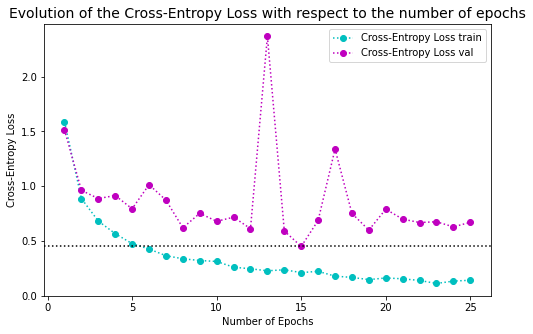

In [6]:
# auxiliary loss
use_auxiliary_loss = True
aux_loss_weight = 0.3   # <0.5

# model
model = DeepConvNet(use_auxiliary_loss)
model_name='DeepConvNet + Aux. Loss'

# training
percentage_val = 0.1
augment = False
nb_epochs = 25
batch_size = 25

# optimizer
weight_decay = 0.001
lr = 0.001
period = 1

# display
verbose = 1
plot = True

run_experiment(model, use_auxiliary_loss=use_auxiliary_loss, aux_loss_weight=aux_loss_weight, model_name=model_name, augment=augment, percentage_val=percentage_val,nb_epochs=nb_epochs, batch_size=batch_size, weight_decay=weight_decay, lr=lr, verbose=verbose, plot=True);

## Weight Sharing

Device used:  cuda
Loading training and test set...
Splitted the training set in training and validation set
Number of parameters of the model: 2699968
Training...
Training time: 40.447 seconds
The model weights have been correctly saved in:  ./model_weights/DeepConvNet + Weight Sharing.pth

Training error: 12.667 %
Validation error: 14.000 %
Test error: 15.500 %


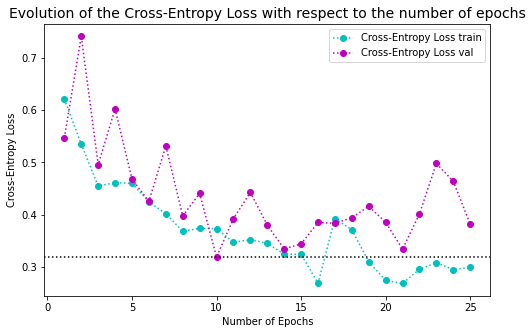

In [7]:
# auxiliary loss
use_auxiliary_loss = False
aux_loss_weight = 0.3   # <0.5

# model
model = Siamese(use_auxiliary_loss)
model_name='DeepConvNet + Weight Sharing'

# training
percentage_val = 0.1
augment = False
nb_epochs = 25
batch_size = 25

# optimizer
weight_decay = 0.001
lr = 0.001
period = 1

# display
verbose = 1
plot = True

run_experiment(model, use_auxiliary_loss=use_auxiliary_loss, aux_loss_weight=aux_loss_weight, model_name=model_name, augment=augment, percentage_val=percentage_val,nb_epochs=nb_epochs, batch_size=batch_size, weight_decay=weight_decay, lr=lr, verbose=verbose, plot=True);

## Auxiliary Loss + Weight Sharing

Device used:  cuda
Loading training and test set...
Splitted the training set in training and validation set
Number of parameters of the model: 2762698
Training...
Training time: 41.902 seconds
The model weights have been correctly saved in:  ./model_weights/DeepConvNet + Weight Sharing + Aux. Loss.pth

Training error: 3.333 %
Validation error: 7.000 %
Test error: 5.900 %


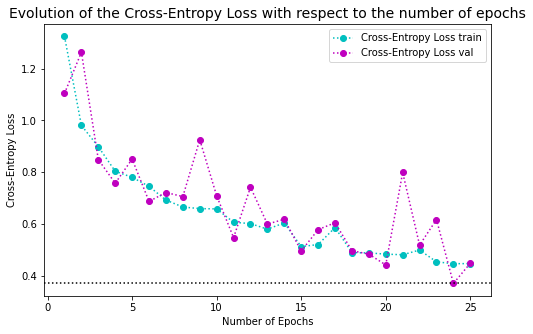

In [8]:
# auxiliary loss
use_auxiliary_loss = True
aux_loss_weight = 0.3   # <0.5

# model
model = Siamese(use_auxiliary_loss)
model_name='DeepConvNet + Weight Sharing + Aux. Loss'

# training
percentage_val = 0.1
augment = False
nb_epochs = 25
batch_size = 25

# optimizer
weight_decay = 0.001
lr = 0.001
period = 1

# display
verbose = 1
plot = True

run_experiment(model, use_auxiliary_loss=use_auxiliary_loss, aux_loss_weight=aux_loss_weight, model_name=model_name, augment=augment, percentage_val=percentage_val,nb_epochs=nb_epochs, batch_size=batch_size, weight_decay=weight_decay, lr=lr, verbose=verbose, plot=True);